In [1]:
### I stop using OpenCV to extract features myself, there are 115200 features even after I resize them.
### From here, I start to call Microsoft API.
import matplotlib.pyplot as plt
import pprint
import requests
from urllib.request import urlretrieve
import json
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


%matplotlib inline
subscription_key = 'a2b4c57884cb455e88b4f419c037ca8b'

vision_base_url = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0'
vision_analyze_url = vision_base_url + '/analyze?'    



# define the function to evaluate an image using Microsoft Vision API
def analyze_image(image_url):
    
    # Microsoft API headers, params, etc
    headers = {'Ocp-Apim-Subscription-key': subscription_key}
    params = {'visualfeatures': 'Description,Tags'}
    data = {'url': image_url}
    
    # send request, get API response
    response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
    response.raise_for_status()
    analysis = response.json()
    return analysis

# return the max_confidence_value and image_size as the features of the images
def extract_features(data):
    if data["tags"]:
        return data["tags"][0]['confidence'], data["metadata"]["width"] * data["metadata"]["height"]
    else:
        return 0, data["metadata"]["width"] * data["metadata"]["height"]




In [2]:
# test the function
image_url = 'https://ivc.ischool.utexas.edu/VizWiz/data/Images/VizWiz_test_000000020001.jpg'
data = analyze_image(image_url)
# pprint.pprint(data)

features = extract_features(data)
pprint.pprint(features)

(0.6813478469848633, 499392)


In [3]:
%%time
# define the urls
base_url = 'https://ivc.ischool.utexas.edu/VizWiz/data'
split = 'train'
annFile = '{}/Annotations/{}.json'.format(base_url, split)
imgDir = '{}/Images'.format(base_url)

print(annFile)
print(imgDir)
urlretrieve(annFile, "train.json")


y_train_label_list = []  # labels 1 indicates answerable and 0 indicates unanswerable
y_val_label_list = []  # labels 1 indicates answerable and 0 indicates unanswerable


X_train_question_list = []  # store all 5000 questions from train set whose image can be analyzed
X_val_question_list = []  # store all 500 questions from val set whose image can be analyzed
X_test_question_list = []  # store all 100 questions from test set whose image can be analyzed

X_train_max_confidence_value_list = []   # store all confidence values
X_train_image_size_list = []   # store all image sizes


X_val_max_confidence_value_list = []   # store all confidence values
X_val_image_size_list = []   # store all image sizes


X_test_max_confidence_value_list = []   # store all confidence values
X_test_image_size_list = []   # store all image sizes

# open the json file
with open("train.json") as data:
    labels = json.load(data)

    for vq in labels[0:5000]:
        image_name = vq['image']    # this can be used to get images
        question = vq['question']   # this is the text of questions from training set
        label = vq['answerable']   # this is the label
        image_url = "{}/{}".format(imgDir, vq['image']) 
        

        # call the function to use the API
        # append the value only if it can be analyzed
        try:
            image_data = analyze_image(image_url)
            # Instead of downloading them, I choose to use Microsoft API to help me extract the features.
            X_train_question_list.append(question)
            
            y_train_label_list.append(label)
            print(question)
            
            max_confidence_value, image_size = extract_features(image_data)
            X_train_max_confidence_value_list.append(max_confidence_value)
            X_train_image_size_list.append(image_size)
        except:
            print("This image cannot be processed by Microsoft API:\n", image_name)
        
        
# define the urls to get the validation dataset
valFile = 'https://ivc.ischool.utexas.edu/VizWiz/data/Annotations/val.json'
imgDir = 'https://ivc.ischool.utexas.edu/VizWiz/data/Images'

print(valFile)
print(imgDir)
urlretrieve(valFile, "val.json")




# open the val.json file
with open("val.json") as data:
    labels = json.load(data)

    for vq in labels[0:500]:
        image_name = vq['image']    # this can be used to get images
        question = vq['question']   # this is the text of questions from validation set
        label = vq['answerable']   # this is the label
        image_url = "{}/{}".format(imgDir, vq['image']) 
        
        # call the function to use the API
        # append the value only if it can be analyzed
        try:
            image_data = analyze_image(image_url)
            # Instead of downloading them, I choose to use Microsoft API to help me extract the features.
            y_val_label_list.append(label)
            print(question)
            
            X_val_question_list.append(question)
        
            # call the function to extract
            max_confidence_value, image_size = extract_features(image_data)
            # append the values
            X_val_max_confidence_value_list.append(max_confidence_value)
            X_val_image_size_list.append(image_size)
        except:
            print("This image cannot be processed by Microsoft API:\n", image_name)
        
        

# define the urls to get the test dataset
testFile = 'https://ivc.ischool.utexas.edu/VizWiz/data/Annotations/test.json'

print(valFile)
print(imgDir)
urlretrieve(testFile, "test.json")




# open the json file
with open("test.json") as data:
    labels = json.load(data)

    for vq in labels[0:100]:
        image_name = vq['image']    # this can be used to get images
        question = vq['question']   # this is the text of questions from test set
        image_url = "{}/{}".format(imgDir, vq['image']) 
        
        # call the function to use the API
        # append the value only if it can be analyzed
        try:
            image_data = analyze_image(image_url)
            # Instead of downloading them, I choose to use Microsoft API to help me extract the features.
            print(question)
            X_test_question_list.append(question)
            
            # call the function to extract
            max_confidence_value, image_size = extract_features(image_data)
            # append the values
            X_test_max_confidence_value_list.append(max_confidence_value)
            X_test_image_size_list.append(image_size)
        except:
            print("This image cannot be processed by Microsoft API:\n", image_name)
        
        








https://ivc.ischool.utexas.edu/VizWiz/data/Annotations/train.json
https://ivc.ischool.utexas.edu/VizWiz/data/Images
What's the name of this product?
Can you tell me what is in this can please?
Is this enchilada sauce or is this tomatoes?  Thank you.
What is the captcha on this screenshot?
What is this item?
What's this?
What is in this bottle?
This item.
What color do these look?
Surface look clean? Thank you.
Is this.
What is the sodium content of this can of food?
what is this?
What kind of drink is this?
What flavor are these?
What color... what color is this skirt?
How much money is on the table?
What is the name of this product? What is the name of this product?
What is this? 
Can I ask about anything or any information without taking any pictures?
What is this game?
Alright, and what does this label say?
What is in this can?
What is this movie?
Can you see the piece of mail and can you tell me who this mail is for?
What is this a picture of?
What is this?
Am I right when I say th

What is in this bottle or what is the label on this bottle? Is it magnesium?
What are the instructions for taking this vitamin C?
Where am I?
What flavor is this dinner?
When does this expire?
What color is this?
Could you please tell me what color these beads are?
Hi What kind of coffee is this? What does it say. Thank you
What color is my sweater?
What is the expiration date? 
What type of card is this?
What kind of candy bar is this?
Hi could you please tell me what this box is? Thank you very much.
What do you see? What do you see?
What color is this car?
Who is this?
is the expiration date?
what color is my top?
What is that? Or what is this?
What shop is this bag?
What type of pop is this?
please tell me what kind of car this is
is this shampoo or conditioner
Which book is the piano book? The one on the left or the right?
What is this product?
What does the temperature say? 
What is this a can of?
What is in this can please?
What kind of currency is this?
What is written on the p

Can you tell what this is?
Can you tell what is in this bag or if there's anything in print that you can read?
What is this?
What color is it?
Is this bottle?
Yeah, just disregard this, I'm just testing to see if this will go over Facebook. Thanks.
What kind of a can is this?
Is the directions in this kitchen?
What is this?
What is this item?
What is this please?
What is this?
Can you tell me what this paper is?
How clear is this text? 
What is this package?
Way out of this cooler
What does it say?
What is in this can?
What color are these pair of pants?
What color is my jacket?
What is this?
What color is this fan?
What color is this shirt?
What does he look like?
Which can has the refried beans? The one on the left or the one on the right?
Has this dog got a name on the label?  Normally it does.  I told you Mom.
What is this?
What flavor is this?
What do you see in this picture?
Do you know how to take the sim off on this phone? This is Galaxy Nexus.
What is this?
Can you tell me wha

What does this say?
What color are these pants?
What plant is this?
What time is this?
What kind of pills are they?
What color is this?
What's the name of this movie please?
What is this item?
You have money?
What color is the wedding gown on this bed?
What's on the screen?
What is the title of the CD?
What flavor is this?
What is in this box?
What, what's this?  
Which kind of fruit is this?
What does this say?
What does this sign say?
What color is that?
What is this dough?
What time is it, and what is the temperature at it's annal?
What's this?
What is it? 
What brand are these pretzels?
Can you please tell me what kind of tea or coffee this is?
What color is this? 
Tell me, what is in this can?
What is this?
What does this? What is the flavor of this ice cream?
This can?
What color is this?
Could you tell me which, from, who's this letter from, 'cause I obviously can't read it. Thank you.
What is the boot order for devices?
What time is it?
This image cannot be processed by Microso

what is this product?
what time is it?
What text is on my computer screen please?
Testing, What is this?
what is this
What's the expiration date?
Hello, I've just got a new case on my iPhone, I want to make sure my camera's not obstructed. So, could you please tell me what you see? Thank you.
What color?
What is it?
What's on this card? i'm looking for specifically a 8 digit id number of some kind, hope i didnt wake you up.
What's in this box?
What's on my lap?
So above these buttons that are here. There's like six of them. You might only see three. Are those LED lights above there, indicator lights, or are those buttons above those? They don't. They're not tactile but there's buttons.
What flavor of coffee is this?
What is this product?
What's that?
What's in this box?
What does this say?
Are these plain or chili cheese fritos?
What kind of soup is this? In a second it will be ready and then I can send it to a variety of place. One is kind of an automatic web thing that tries to figur

What is this? Just ask what is that? 
What is the number on this card? 
What color is this comforter?
What is on that box?
What kind of drink is this? THank you.
What is this?
Is this an iPhone?
Who is this?
what is this?
What is this?
What's the email on this page?
What is this
What color are these capris?
Can you please tell me what kind of tea or coffee this is. 
Can you please tell me what type of cheese that is?
What is this?
Creamer is this?
I just want to know if you can tell me the expiration date on this carton of milk?
What is on?
Can you tell me the brand name of this washer?
What's the answer?
What is this product and how do you use it?
Can you tell me what types of flower these are?
What whats the color?
I asked you what color it was, not what it is. Do you even listen? Come on, people.
Is this? What is this?
What is this item?
What are the numbers on this item?
What card is this and can you describe it's orientation, thank you?
What is the temperature on the display set t

What is it?
What's the name of these tablets?
What's the cell phone number on this card?
What is this?
What kind of drink is this?  I know the image is a little blurry.
What's this?
What is this item?
How much power does this unit run?
What was the object I just took a picture of?
What's in this picture?
What is this?
What kind of k-cup is this? 
How many doors?
What color is this?
What is this? What is this?
What is this?
What kind of coffee is this?
What's in this picture?
What does this box say?
What kind of book is this and how thick is the book?
What noise is this?
What are these white chocolate, or milk chocolate buttons?
Okay, this speaker I just sent a picture of, there's print on it, I can tell. Does it say anything about what brand it is, or anything at all?
I've got two kinds of cheese, american and cheddar, which one is this? 
What is this please?
What kind of, what kind of flower is this?
What is that bill?
What is the name of the city?
What flavor is this?
What color is t

Hi, can you tell me what's in this package please? Thank you.
What soap brand is this?
What is this?
What color is this please?
What is the name of this cologne?
What is this?
What brand and item is this?
What is this?
Is there any people in that bus?
Hey can somebody tell me what this is?  Some kind of frozen food. Thanks
Can you tell me what type of savings discount card this may be, please?
is this the ghost chief
What is this?
What color is my dog?
Can you please tell me what this says?
Record. Can you tell me what it says on the bottom of this pane?
Is this some kind of logo or a picture of a bus or what?
Read directions.
What is in this can?
can you tell me anything about this words, pictures etc?
what is this?
What kind of soda is this?
what is this plant?
What is the expiration date?
What is this?
What is this?
What is in this bag?
What color is this
What's in this photo?
What type of pills are these?
What is this item?
What is it?
Does this say it's for cats or dogs?
What is t

What is this, please?
What is this?
What's the name of the restaurant?
What are the words on the building?
What is this?
Where am I or what is this?
Is this ibuprofen or tylenol?
What is this?
What is this?
Is this clear enough? Is this hair spray or is it something for your skin?
What is this?
What multicolors are there in the shirt, is there yellow?
OK, this is the last side.  If we don't find it here I think I'm going to eat something else.  We want convectional oven temperature and number of minutes.  Thank you so very much for your time and effort.
What kind of vitamins are these?
What is this?
What is this? 
What movie is this?
What type, and brand is this deodorant?
What is this, please?
What are the directions for someone who is ten years old?
What color is this?
What is this item.
What is this, please?
what is the title of this book?
is this stone ipa or is this stone smoked porter?
Does this text say?
What kind of cereal is this? 
What is on the screen?
What kind of chocolate

Can you tell me what this accent is please?
This is the last can. Can you tell me what this is? Thank you.
What is this item?
What is the color?
What is that?
What is this?
Simplify the following expression: one twelfths plus three tenths. 
What is this products?
Does this cup say Tim Horton's or Timothy's Coffee of the World?
What color is this mug?
Can you tell me what this is?
Which DVD is this?
Are there any birds in the trees?
What is this?
Can you tell me what flavor of tea this is.
This is sky look like.
please read this label.
is there a chess piece in this picture if so where 
What is this?
What is this document?
Is the floor wet? Is the floor wet?
What is this?
What T-shirt am I wearing?
What is in this box?
What is this bottle?
I'm trying to identify this paper.  I wonder if the text is visible.
Is this card readable now?
read the information the button please
What is this?
What is this?
What is in the cup?
What is this picture of?
Can you tell me what is on the case of this

What is this item?
What product is this? What product is this?
Should I eat this for me tea?
What are in these jars from left to right?
What kind of phone is this?
What does this say?
What's the title of this painting?
What is this?
What color is my pants.
Do you know this logo?
i changed the lighting is there a visible model number anywhere on the face of this device?
What is the cooking instructions?
What color is this shirt?
Can you tell me what this can says? Thank you. 
What is this?
What is this?
What is this cable for?
What is this?
What is the product?
How do I prepare this in the microwave?
What kind of juice is this?
What is this i'm holding in my hand.
What is this
What's this? What's this say?
What does this sign say?
What is this item?
This is Brooklyn Beans coffee. What flavor is it?
Could you please tell me what is the name of this on this bottle?
Are these buttons labeled in anyway?
What is this, please?
what does this can say?
Can you tell what dinner this is?
What col

What is that?
What color is that please?
what is this?
What kind of radio is this?
What is this item?
What's the name of this CD?
This is just a test. Should be a door.
What is in this box?
What color this shirt? 
What is this package?
What color is this pillow?
Can you tell me about the microwave screen?
What does my screen say?
Is the southern pecan or hazelnut coffee?
What is this?
What color is this? 
On this label.
What is this?
Is this a can of canola cooking spray?
What is this, please?
What is this?
What kind of dog is this?
Tell me what color is these chips?
what is this?
What is in this box, thank you.
what is this i am holding?
What size is this?
What is in this bottle?
What ? is this? 
When does this expire?
What is the black thing?
What product is this?
What is can? Can you tell me what is in it please? Thank you.
When do these expire?
Can you tell me what my weight is please?
What flavor of coffee is this?
What scent is this?
What is this?
What movie is this?
What is this

What does this microwave say?
What's in this bottle?
Is it possible to tell the ingredients of this pizza, and the brand?  Thanks.
What is this?
What does this caption say?
What is this?
What album is this?
What kind of watch is this?
What is this?
Can you tell me what's in this box?
This is the next side for the expiration date for the yogurt. Just looking for that.
What's this magazine?
What kind of cat is this?
Can I get a description of what this christmas tree ornament is please?
What is in this can?
What is this?
What is this?
Is this a Atari 2600 game?
What is the title of this book?
Can you tell me what type of macaroni this is so I can look up some directions for it.
Can you tell who put this one out?
What is this
Can you please tell me how many percent of the download has completed so far? Thank you very much.
What is this item?
Read me the directions on how to cook this.
What is this?
I wanna know what the cooking instructions for this packet are
Does it say what this is?
Wh

What is this?
What is in this package?
What color is that please?
What's on this desk?
What is this?
What does this can contain?
What is this?
What brand is this shaver?
Who is this from?
What does this say?
What brand peanut are these?
Can you tell me what this box says? I hope it's not too dark. Thank you.
What is this?
Can you describe that, can you describe that to me?
What kind of essential oil is this?
what is this?
What is this hanging on the closet door?  Can you tell me? Or write a detailed description of what it looks like.  I really appreciate this.  Thank you.  Goodbye.
What is this?
Can you tell me the brand and model of these?
What is this? Thank you.
How is this game played and what is it?
What is this?
What color is it?
What is the expiration date?
I know this is baby ganics.  I asked what kind of baby ganics. Is it floor, bathroom, tile, all purpose?  Thank you.
Is this?
What is this a bottle of? Thank you.
What is this?
What is this?
What is this?
What is this?
What i

What color is this shirt?
What color are these pants?
What is this bottle?
What color and kind of dog is it?
What does this screen say?
What's this?
Can you tell me about where the arrow is? Is it like at 3'o'clock or 12 o'clock on a clock?
What video game is this? And what model is it?
Can you tell me what kind of fish this is and how to cook it?
What does that do in a foosball table? Oh, yeah. 
What's in this can?
What does this cup look like? Thank you.
What is this?
What kind of liquor is this? 
What kind of soap is this?
I lined up five dvd's, which one is my sound of music dvd?
What is this?
What about now, does it load now?
Any writing on this package?
Yes, I need to determine what the captcha image on this photo is, thank you. 
What is it?
What color are the beads in the charm on this necklace?
What time is it?
What is this?
Is this real diet dr. pepper or is this some off brand?
Yes, what does the facts say?
What video game is this?
What flavor is this?
What is this?
What is t

What is this box?
What is this CD?
What is this ?
What is in this bottle?
What is this?
Hi there tell me what the title of this dvd is please?
What is this? 
Do you think this is a natural blonde?
What is my computer screen reading?
What flavor of Keurig coffee is this?
what's in this can?
What is this?
What is in the picture?
What is the expiration date?
Which one of these is shampoo, please?
What is this?
What book is this?
What is in this box?
What color is this cloth?
What is this?
What is this?
This is the display of a treadmill. Can you tell me the distance off the top display, please?
what kind of flower is this?
What's that?
What color and pattern?
What color is this shirt?
Can you please read out what is on this little screen? I think is says something on one line.
okay let's try this look at my screen if you well and tell me what's the display there will probably be an error message but let me know thanks very much.
What is it?
Which coupon is this?
What is the message on thi

Okay is this better or is this too close?
what is the style and color of this garment?
What is this?
What is on the screen? And what kind of screen is it?
what is this?
What is the label on the glass jar in the picture? I think it's pasta sauce but I can't be sure.
What type of pills are in this bottle
What object is this? What object is this? What object is this? What object is this? What object is this? What object is this? 
What is this?
What kind of tea is this?
I'm not sure if you can see this, but I am trying to see the tablet count in this bottle.
what does this one say?
What time is it? What time is it?
What color is this tie?
What flavor soda is that please?
What does the display say?
What is this item?
Is it sunny outside?
What kind of chocolate is this?
What is that book?
Can you please tell me what this page number is? 
Can you please tell me what store in front of me? thank you.
What is this? 
What is this a picture of?
what is this item?
What is this document?
What is tha

What time is it?
What is this?
What is this?
What is this?
what is this please?
What does this piece of paper say?
What colors are the milk bottles?
This is the display of a treadmill.  Could you tell me the distance in miles please?
What is this?
What color are these jeans? Pink or gold?
What color is the cardigan and what color are the stripes on the cardigan?  And what sort of shirt should I wear under it to make it match?  Thank you.
What flavor of green mountain coffee is this? Flavor, please.
What kind of soup is this?
What is the title of this CD?
What color is the shirt?
Can you please tell me what kind of coffee or tea this is?
what kind of chips are those?
What is in this bottle?
Okay, hopefully this is a closer view of this red box which is a Jambox speaker. I need to know the serial number which I think is the bottom line of several lines of print. Thank you.
What color is this cat?
what's in this package?
You tell me what kind of vehicle or what type of vehicle this is? 
C

Please describe this label. Thank you. 
What is this?
What kind of cigarette is this?
What is this item?
Is there a number of wifi password on this router?
What is the color of this shirt?
What's this? Hello?
What is the phone number on the printer?
What are in these?
What is this can?
I need to know what this is, thank you in advance.
Yes, this is a card. If you can tell me the picture on it, that would be very useful. Look forward to hearing from you.
What color is this?
What is this?
What is this?
What is this?
What is this season?
What's the 5 digit number on the top left corner? thanks.
What's a scallywag? scallywag? What's a scallywag, scallyway?
Yes, I need to determine the captcha code in this image.  Thank you.
What is this?
Is this red or white wine please?
What's this?
Whats on my computer screen?
What's in this bottle?
What is blocking the road in this photo?
What is this please?
What's in the picture?
What is this?
What is this picture of?
What type of tea is this?
What co

What is this?
What's the name of this book?
What is this?
what design does this rug have on it?
What species of dog is this?
what is this?
What page is this?  Thank you.
What is this?
what kind of seasoning is this?
Hello, what does this can say? I'm trying out this new app. I'm blind. I think it's going to be a great thing for me.
what does this say?
What's that?
What flavor is this?
What is this?
What color is this?
Cleaning. What is it?
What is the expiration date?
What device is this?
What is this recipe?
What is this?
Can you please describe this card and then is it upside down?
What is the thermostat set to?
Are you able to read any of these instructions?
participating in the pilot study for clothing
What color is the dog, and what type of magazine is this?
What is this can? What is in this can?
Which product is this please?
can you see the label on this bottle?
What is this?
What color is this shirt?
What is the expiration date?
would you be able to tell me the buttons across fr

What is this a picture of?
What is this frozen dinner?
What is this?
I think this is spinach but can you tell me what kind of vegetable this is?
Is this dark or white rice?
What flavor of soup is this? Thanks. 
What's in this can please? Hopefully I got the right side of the label.
What color shirt is this?
What's this?
So the sky looks like there is a storm coming.
What is it?
What's this?
Can you tell me who this is please?
What color is this please? 
What is in front of me? 
Is this and how long do I cook it for?
What is this?
What kind of medicine is this?
whats this button?
What is this piece of mail?
Is the light on or off?
please describe this bar of chocolate for me
I'm looking for the expiration date. Thank you.
This is the display of a treadmill. Can you tell me the distance and miles please off the top display?
What is this?
What movie?
What cleaner is this?
What color is the jacket?
What is this?
Please read any word on the CD.
Contents of can?
Does this jewelry match this 

What voltage and wattage are on this power supply?
What color is this?
Can you tell me what pill this is?
What's the model number, if it's visible?
Where is the printer?
What kind of cough drops are these?
what is this? what it is this?
Expiration date.
Is this a beer can? 
Can you tell what this item is?
What is this?
What this? What's this marker?
Screen, thank you.
What is this?
What does this look like?
what is this?
Who is answering my question?
What kind of juice might this be? 
what type of medicine is this?
Tell me what it is.
What is this?
Is there anything on this tin that could help me identify the name of it, the brand or anything?
What does this bag say?
What denomination is this dollar bill? 
What is in this can?  I hope I got a good picture of it.
What is this?
Do you like coffee?
What does this say? What does this say?
what flavor is this?
What's in this tin?  Thank you.
Hope my finger wasn't in the way but did it get the message this time?
What card is this?
What butto

Whats this shirt look like, thanks?
What color is this?
What's this? What's in the vegetables?
what type of meal is this?
Can you tell me what this is?
What is this?
What is in this bottle?
What are these?
What is this?
I'm looking for the sound category to be highlighted.  How far away am I?
What does it say exactly on this coupon?
Which packet contains plain flower?
For how long do I cook this in the microwave?
See an expiration date on this milk carton
Can you tell me if there are any photos on the CD cover and if so can you give me a description of them?
What is this title?
What's that brand name say? I'd like to know what company made that stereo.
What beer is that?
what show is this?
What is the answer 79.54 minus 43.16?
What is on this page?
what color is this haircut?
What is it?
what is the name of the product in the can in the picture?
What kind of pasta-roni is this? Guess what?
What sent?
What is this nondescript object?
What is this?
what kind of pee is this?
What color is

In [4]:
%%time
question_list = []  # store all questions of training set

# open the train.json file
with open("train.json") as data:
    labels = json.load(data)
    for vq in labels:
        question = vq['question']   # this is the text of questions from training set
        question_list.append(question)
        

Wall time: 437 ms


In [18]:
%%time

# use bag of words to constitute word vectors
count = CountVectorizer()

# convert list into array
docs_all = np.array(question_list)
docs_train = np.array(X_train_question_list)
docs_val = np.array(X_val_question_list)
docs_test = np.array(X_test_question_list)

# create vocabulary
bag_all = count.fit_transform(docs_all)

# transform the other bags
bag_train = count.transform(docs_train)   
bag_val = count.transform(docs_val)
bag_test = count.transform(docs_test)

# print(count.vocabulary_)
# print(bag.toarray())

tfidf = TfidfTransformer(use_idf=True,
                      norm = 'l2',
                      smooth_idf=True)

all_questions = tfidf.fit_transform(bag_all).toarray()

# transform the other bags to tf-idf
X_train_questions = tfidf.transform(bag_train).toarray()
X_val_questions = tfidf.transform(bag_val).toarray()
X_test_questions = tfidf.transform(bag_test).toarray()


print(np.shape(X_train_questions))
print(np.shape(X_train_question_reduced))

print(np.shape(X_val_questions))
print(np.shape(X_val_question_reduced))

print(np.shape(X_test_questions))
print(np.shape(X_test_question_reduced))


# two features of the image: max_confidence_value & image_size
X_train_image_feature1 = np.array(X_train_max_confidence_value_list).reshape(-1, 1)
X_train_image_feature2 = np.array(X_train_image_size_list).reshape(-1, 1)
X_val_image_feature1 = np.array(X_val_max_confidence_value_list).reshape(-1, 1)
X_val_image_feature2 = np.array(X_val_image_size_list).reshape(-1, 1)
X_test_image_feature1 = np.array(X_test_max_confidence_value_list).reshape(-1, 1)
X_test_image_feature2 = np.array(X_test_image_size_list).reshape(-1, 1)

np.savetxt('X_train_questions.csv', X_train_questions, delimiter = ',')
np.savetxt('X_val_questions.csv', X_val_questions, delimiter = ',')
np.savetxt('X_test_questions.csv', X_test_questions, delimiter = ',')

np.savetxt('X_train_image_feature1.csv', X_train_image_feature1, delimiter = ',')
np.savetxt('X_train_image_feature2.csv', X_train_image_feature2, delimiter = ',')

np.savetxt('X_val_image_feature1.csv', X_train_image_feature1, delimiter = ',')
np.savetxt('X_val_image_feature2.csv', X_train_image_feature2, delimiter = ',')

np.savetxt('X_test_image_feature1.csv', X_train_image_feature1, delimiter = ',')
np.savetxt('X_test_image_feature2.csv', X_train_image_feature2, delimiter = ',')



y_train = np.array(y_train_label_list)
y_val = np.array(y_val_label_list)

np.savetxt("y_train.csv", y_train, fmt="%d", delimiter = ',')
np.savetxt("y_val.csv", y_val, fmt="%d", delimiter = ',')

(4996, 4478)
(4996, 666)
(499, 4478)
(499, 666)
(100, 4478)
(100, 666)
Wall time: 18.3 s


Start loop  1
PCA  1
Combined 1
Scaled 1
Trained 1
Start loop  51
PCA  51
Combined 51
Scaled 51
Trained 51
Start loop  101
PCA  101
Combined 101
Scaled 101
Trained 101
Start loop  151
PCA  151
Combined 151
Scaled 151
Trained 151
Start loop  201
PCA  201
Combined 201
Scaled 201
Trained 201
Start loop  251
PCA  251
Combined 251
Scaled 251
Trained 251
Start loop  301
PCA  301
Combined 301
Scaled 301
Trained 301
Start loop  351
PCA  351
Combined 351
Scaled 351
Trained 351
Start loop  401
PCA  401
Combined 401
Scaled 401
Trained 401
Start loop  451
PCA  451
Combined 451
Scaled 451
Trained 451
Start loop  501
PCA  501
Combined 501
Scaled 501
Trained 501
Start loop  551
PCA  551
Combined 551
Scaled 551
Trained 551
Start loop  601
PCA  601
Combined 601
Scaled 601
Trained 601
Start loop  651
PCA  651
Combined 651
Scaled 651
Trained 651
Start loop  701
PCA  701
Combined 701
Scaled 701
Trained 701
Start loop  751
PCA  751
Combined 751
Scaled 751
Trained 751
Start loop  801
PCA  801
Combined 801
S

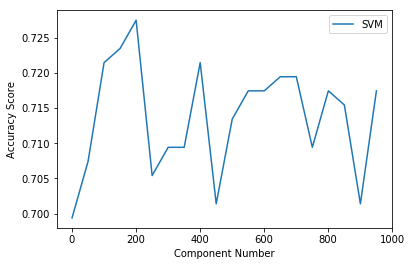

In [23]:
%%time
#Use PCA to reduce the features of questions
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline


accuracy_score_list = []
components_list = []
best_score = 0
best_component_num = 0
# There are 4478 features in total in text
for component_num in range (1,1000,50):
    print("Start loop ", component_num)
    pca = PCA(n_components=component_num).fit(all_questions)
    # transform the features of texts
    X_train_question_reduced = pca.transform(X_train_questions)
    X_val_question_reduced = pca.transform(X_val_questions)
    X_test_question_reduced = pca.transform(X_test_questions)
    
    print("PCA ", component_num)
    # combine the features of images with the features of text
    X_train = np.hstack((X_train_question_reduced, X_train_image_feature1, X_train_image_feature2))
    X_val = np.hstack((X_val_question_reduced, X_val_image_feature1, X_val_image_feature2))
    X_test = np.hstack((X_test_question_reduced, X_test_image_feature1, X_test_image_feature2))

    
    
    print("Combined", component_num)
    # Transform scale of data
    mms = MinMaxScaler()
    mms.fit(X_train)
    
    
    print("Scaled", component_num)
    X_train_scaled = mms.transform(X_train)
    X_val_scaled = mms.transform(X_val)
    X_test_scaled = mms.transform(X_test)

    # Train and evaluate the linear SVM
    svm_clf = LinearSVC()
    svm_clf.fit(X_train_scaled, y_train)
    
    print("Trained", component_num)
    curValidationAccuracy = svm_clf.score(X_val_scaled, y_val)
    if best_score < curValidationAccuracy:
        best_score = curValidationAccuracy
        best_component_num = component_num

    accuracy_score_list.append(curValidationAccuracy)
    components_list.append(component_num)
    
    
plt.plot(components_list,accuracy_score_list,label = "SVM")
plt.ylabel("Accuracy Score")
plt.xlabel("Component Number")
plt.legend()

print("the best score is ", best_score)
print("the best number of components is ", best_component_num)

# LogisticRegression is not as good as SVM
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(X_train_scaled, y_train)
# lr_Accuracy = lr.score(X_val_scaled, y_val)
# print(lr_Accuracy)

In [25]:

pca = PCA(n_components=201).fit(all_questions)
# transform the features of texts
X_train_question_reduced = pca.transform(X_train_questions)
X_val_question_reduced = pca.transform(X_val_questions)
X_test_question_reduced = pca.transform(X_test_questions)

# combine the features of images with the features of text
X_train = np.hstack((X_train_question_reduced, X_train_image_feature1, X_train_image_feature2))
X_val = np.hstack((X_val_question_reduced, X_val_image_feature1, X_val_image_feature2))
X_test = np.hstack((X_test_question_reduced, X_test_image_feature1, X_test_image_feature2))


# Transform scale of data
mms = MinMaxScaler()
mms.fit(X_train)


X_train_scaled = mms.transform(X_train)
X_val_scaled = mms.transform(X_val)
X_test_scaled = mms.transform(X_test)

# Train and evaluate the linear SVM
svm_clf = LinearSVC()
svm_clf.fit(X_train_scaled, y_train)

y_predicted = svm_clf.predict(X_test_scaled)

np.savetxt("Sifan_Guo.csv", y_predicted, fmt="%d", delimiter=",")